In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttv2fast2furious.kepler import KOISystemObservations
import ttvfast
import h5py
h5data = h5py.File("/Users/shadden/Projects/00_Codes_And_Data/HL17_Posteriors/NBody_MCMC_Posteriors.hdf5")
import sys
sys.path.append("../01_code/")
from HL17_posterior_to_rb_sim import *

In [2]:
#KOI_num,kepler_name = 707, "Kepler-33"
KOI_num,kepler_name = 157, "Kepler-11"
#KOI_num,kepler_name = 377, "Kepler-9"
observations = KOISystemObservations(KOI_num)
mcmc_data = h5data[kepler_name]['DefaultPriors']['PosteriorSample']

In [3]:
# periods of planets in observed data
obs_periods = [o.linear_best_fit()[1] for o in observations.values()]

# Periods from MCMC data
data_periods = mcmc_data[0,1::5]

# Number of planets in ttv fit
Nplanets = len(data_periods)

# put the observational data in to correct order
observations_list = [list(observations.values())[np.argmin(np.abs(obs_periods - data_p))] for data_p in data_periods]

# minimum and maximum observed transit times
tmin,tmax = np.min([np.min(obs.times) for obs in observations_list]),np.max([np.max(obs.times) for obs in observations_list])

# get random posterior sample 
mcmc_sample = mcmc_data[np.random.randint(0,len(mcmc_data))]
# generate TTVFast input parameters
params,epoch = hdf5row_to_ttvfast_params_and_epoch(mcmc_sample)
# compute transit times
times = ParamsToTransitTimes(Nplanets,params,tmax,epoch=epoch,Mstar=1)

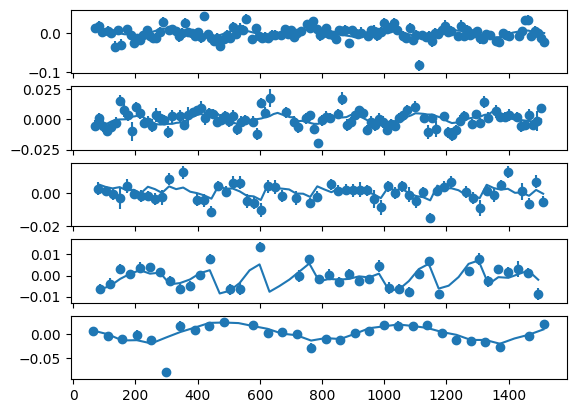

In [4]:
# plot observations versus calculated times
fig,ax = plt.subplots(Nplanets,1,sharex=True)
for i in range(Nplanets):
    times_calc = times[i]
    obs = observations_list[i]
    n = obs.transit_numbers[0] + np.arange(len(times_calc))
    t0,p = obs.linear_best_fit()
    dt = times_calc - p * n - t0
    l, = ax[i].plot(times_calc,dt)
    ax[i].errorbar(obs.times,obs.linear_fit_residuals(),obs.uncertainties,fmt='o',color=l.get_color())

Text(0, 0.5, 'x')

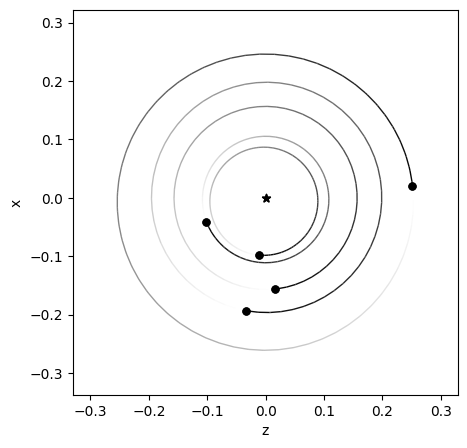

In [5]:
sim = ttv_fast_params_to_rebound_simulation(params,epoch)
rb.OrbitPlot(sim,projection='zx')
ax =plt.gca()
ax.set_xlabel("z")
ax.set_ylabel("x")